# Student Score Prediction Using Supervised ML

In [29]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Uploading dataset

data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(data)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [32]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


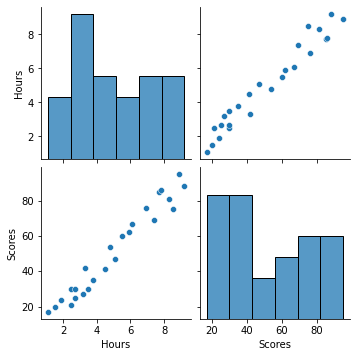

In [34]:
#Investigating the correlation between the columns 

sns.pairplot(student_data)

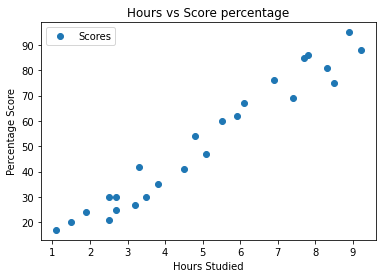

In [35]:
# Scatter plot

student_data.plot(x='Hours', y='Scores' , style='o')  
plt.title('Hours vs Score percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Density'>

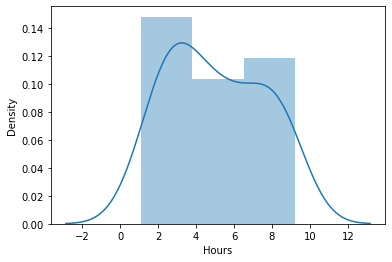

In [36]:
#Checking the column to be predicted on how its is distributed

sns.distplot(student_data['Hours'])

From the above plot we can see the average distribution is around 1 to 3 hours and the second highest is between 7 to 9

<AxesSubplot:>

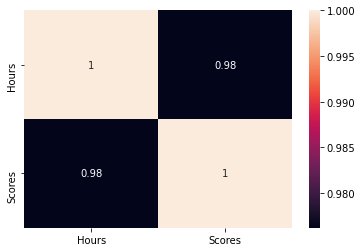

In [37]:
#check the correlation between each columns using a heat map 

sns.heatmap(student_data.corr(), annot = True )

# Assigning Test and Training sets

In [38]:
#lets assign X label

X = student_data.iloc[:, :-1].values  

#Lets assign the target variable 'Hours' for the Y label

y = student_data.iloc[:, 1].values  

In [39]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the model

In [40]:
from sklearn.linear_model import LinearRegression 

LM = LinearRegression()  

LM.fit(X_train, y_train) 


LinearRegression()

# **Making Predictions**


In [41]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
Pred = LM.predict(X_test) # giving the model an unexpexted data to predict

In [43]:
Pred #this shows the prediction made by the model for the X_test data

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [44]:
# Comparing Actual vs Predicted

new_df = pd.DataFrame({'Actual': y_test, 'Predicted': Pred})  
new_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
#now lets check the intercepts by calling the model

print(LM.intercept_)

2.018160041434683


In [46]:
 #the o/p coefficient will realate to each and every value in the datatset

LM.coef_

array([9.91065648])

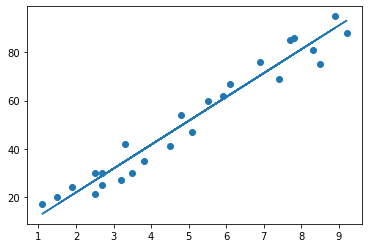

In [47]:
# regression line

Reg_line = LM.coef_*X+LM.intercept_

#Lets check the above in visualization

plt.scatter(X, y)
plt.plot(X, Reg_line);
plt.show()

We can see that both the y_test data and the X_train data are more or less near the linear line

<AxesSubplot:ylabel='Density'>

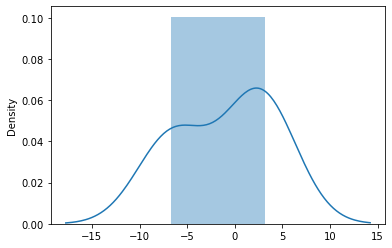

In [48]:
#Let plot a histogram of the residuals if any 

sns.distplot((y_test - Pred)) #Residual is the difference between the actual value and the predicted value

# Evaluation of Regression

Now our goal is to minimise the error if any with various evaluation metrics

In [49]:
from sklearn import metrics

In [50]:
#Mean Average Error (MAE) - its the average of errors

print('Mean Average Error is :' , metrics.mean_absolute_error(y_test,Pred))

Mean Average Error is : 4.183859899002975


In [51]:
#Mean Squared Error (MSE) - better cancellation of larger error compared to MAE as it is squaring them

print('Mean Squared Error is :' , metrics.mean_squared_error(y_test,Pred))

Mean Squared Error is : 21.5987693072174


In [52]:
#Root Mean Squared Error (RMSE) - Most accurate of all as it can be interpreted in the 'y' units

print('Root Mean Squared Error is :' , np.sqrt(metrics.mean_squared_error(y_test,Pred)))

Root Mean Squared Error is : 4.6474476121003665


We can consider RMSE evaluation metric for our model as its the most accurate out of the 3 

# Now Lets Test the Model with our own data to Predict the Score

In [53]:
input_value = np.array(9.25).reshape(-1, 1)
Pred = LM.predict(input_value)
print("No of Hours = {}".format(input_value))
print("Predicted Score = {}".format(Pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
